#### Transformer for prediction of binary hi/lo drug response  
Template: https://keras.io/examples/structured_data/tabtransformer/  
Version 1.1, feature dimension reductions to n = 10, 25  

In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

/Users/karlberb/miniforge3/envs/tf310/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Loss and accuracy plot functions

In [2]:
def plot_training_loss(loss_dict, latent_dim, merged_df, feat_type, model_type):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_dict['loss'], marker='o', linestyle='-', color='b')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title('AUC binary '+feat_type+' '+model_type+' training loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.annotate('Samples: {}'.format(len(merged_df))+'\nFeature dim: '+str(latent_dim), 
                 xy=(0.7, 0.3), xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)
    plt.savefig(
        'AUC_v1/'+model_type+'_loss_plots/'+feat_type+'_'+str(
            latent_dim)+'_'+model_type+'_training_loss.png')

In [3]:
def plot_training_accuracy(loss_dict, latent_dim, merged_df, feat_type, model_type):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_dict['accuracy'], marker='o', linestyle='-', color='b')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title('AUC binary '+feat_type+' '+model_type+' training accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.annotate('Samples: {}'.format(len(merged_df))+'\nFeature dim: '+str(latent_dim), 
                 xy=(0.7, 0.3), xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)
    plt.savefig(
        'AUC_v1/'+model_type+'_accuracy_plots/'+feat_type+'_'+str(
            latent_dim)+'_'+model_type+'_training_accuracy.png')

In [4]:
def plot_validation_loss(loss_dict, latent_dim, merged_df, feat_type, model_type):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_dict['val_loss'], marker='o', linestyle='-', color='r')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title('AUC binary '+feat_type+' '+model_type+' validation loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.annotate('Samples: {}'.format(len(merged_df))+'\nFeature dim: '+str(latent_dim), 
                 xy=(0.7, 0.3), xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)
    plt.savefig(
        'AUC_v1/'+model_type+'_loss_plots/'+feat_type+'_'+str(
            latent_dim)+'_'+model_type+'_validation_loss.png')

In [5]:
def plot_validation_accuracy(loss_dict, latent_dim, merged_df, feat_type, model_type):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_dict['val_accuracy'], marker='o', linestyle='-', color='r')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title('AUC binary '+feat_type+' '+model_type+' validation accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.annotate('Samples: {}'.format(len(merged_df))+'\nFeature dim: '+str(latent_dim), 
                 xy=(0.7, 0.3), xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)
    plt.savefig(
        'AUC_v1/'+model_type+'_accuracy_plots/'+feat_type+'_'+str(
            latent_dim)+'_'+model_type+'_validation_accuracy.png')

### Setup

#### max diff

In [49]:
feat_type = 'max_diff' # section toggle, to plot functions

In [12]:
latent_dim = 10
exprs_feats = pd.read_csv('AUC_v1/max_diff_expr_10.tsv',
                            sep = '\t', index_col = 0)

In [50]:
latent_dim = 25
exprs_feats = pd.read_csv('AUC_v1/max_diff_expr_25.tsv',
                            sep = '\t', index_col = 0)

In [ ]:
latent_dim = 50
exprs_feats = pd.read_csv('AUC_v1/max_diff_expr_50.tsv',
                            sep = '\t', index_col = 0)

In [ ]:
latent_dim = 100
exprs_feats = pd.read_csv('AUC_v1/max_diff_expr_100.tsv',
                            sep = '\t', index_col = 0)

In [ ]:
latent_dim = 150
exprs_feats = pd.read_csv('AUC_v1/max_diff_expr_150.tsv',
                            sep = '\t', index_col = 0)

#### UMAP

In [106]:
feat_type = 'UMAP' #

In [107]:
latent_dim = 10
exprs_feats = pd.read_csv('AUC_v1/UMAP_expr_10.tsv',
                            sep = '\t', index_col = 0)

In [140]:
latent_dim = 25
exprs_feats = pd.read_csv('AUC_v1/UMAP_expr_25.tsv',
                            sep = '\t', index_col = 0)

In [ ]:
latent_dim = 50


In [ ]:
latent_dim = 100
exprs_feats = pd.read_csv('AUC_v1/UMAP_expr_100.tsv',
                            sep = '\t', index_col = 0)

In [ ]:
latent_dim = 150


#### VAE

In [197]:
feat_type = 'VAE' #

In [198]:
latent_dim = 10
exprs_feats = pd.read_csv('AUC_v1/VAE_expr_10.tsv',
                            sep = '\t', index_col = 0)

In [231]:
latent_dim = 25
exprs_feats = pd.read_csv('AUC_v1/VAE_expr_25.tsv',
                            sep = '\t', index_col = 0)

In [ ]:
latent_dim = 50


In [ ]:
latent_dim = 100


In [ ]:
latent_dim = 150


### Model setup

In [ ]:
# Read the y target and categorical X file
# Retain in memory for numeric feature iterations

In [8]:
y_catX = pd.read_csv('AUC_v1/AUC_binary_unq_pairs.tsv',
                            sep = '\t', index_col = 0)
y_catX.set_index('improve_sample_id', inplace=True)

In [9]:
y_catX.duplicated().sum()

0

In [10]:
y_catX.shape

(2099059, 3)

In [11]:
y_catX_dwn_smpl = y_catX.sample(n=50000) # Reduced from 100k in version 1 tests

### Build the input frame for numeric feature set n

In [232]:
merged_df = y_catX_dwn_smpl.merge(
    exprs_feats, left_index=True, right_index=True)
merged_df['fnlwgt'] = 1.

In [233]:
merged_df

,AUC,canSMILES,pairs,cl_ln_gxp_0,cl_ln_gxp_1,cl_ln_gxp_2,cl_ln_gxp_3,cl_ln_gxp_4,cl_ln_gxp_5,cl_ln_gxp_6,...,cl_ln_gxp_16,cl_ln_gxp_17,cl_ln_gxp_18,cl_ln_gxp_19,cl_ln_gxp_20,cl_ln_gxp_21,cl_ln_gxp_22,cl_ln_gxp_23,cl_ln_gxp_24,fnlwgt
improve_sample_id,,,,,,,,,,,,,,,,,,,,,
2.0,high,CCCCC(C)C(C(CC(C)CC(CCCCC(CC(C(C)N)O)O)O)OC(=O...,2.0_CCCCC(C)C(C(CC(C)CC(CCCCC(CC(C(C)N)O)O)O)O...,0.0,1.72768,0.000000,2.178468,0.000000,0.000000,0.258668,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.434945,0.000000,1.072425,1.0
4.0,low,CN1CCN(CC1)C2=CC=C(C=C2)NC3=NC=C(C(=N3)SC4=CC=...,4.0_CN1CCN(CC1)C2=CC=C(C=C2)NC3=NC=C(C(=N3)SC4...,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
4.0,high,CC(C)C1=CC=CC=C1OC(=O)NCCC2=CC3=CC=CC=C3C=C2,4.0_CC(C)C1=CC=CC=C1OC(=O)NCCC2=CC3=CC=CC=C3C=C2,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
4.0,high,CC(C)OC1=C(C=CC(=C1)OC)C2=NC(C(N2C(=O)N3CCNC(=...,4.0_CC(C)OC1=C(C=CC(=C1)OC)C2=NC(C(N2C(=O)N3CC...,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
4.0,low,CC1(CCCN1C2=NN3C=CC=C3C(=N2)NC4=NNC(=C4)C5CC5)...,4.0_CC1(CCCN1C2=NN3C=CC=C3C(=N2)NC4=NNC(=C4)C5...,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97123.0,high,CC1(C[Se]C1)N2C3=CC=CC=C3N(C2=O)C,97123.0_CC1(C[Se]C1)N2C3=CC=CC=C3N(C2=O)C,0.0,0.00000,1.568556,1.124516,0.000000,1.096508,0.275017,...,0.0,1.401150,0.0,0.0,1.368960,0.000000,1.243957,1.431726,0.000000,1.0
97123.0,low,CC1=CC(=C(C(=C1)C)S(=O)(=O)N(CCCCCCN)OCCCN)C.Cl,97123.0_CC1=CC(=C(C(=C1)C)S(=O)(=O)N(CCCCCCN)O...,0.0,0.00000,1.568556,1.124516,0.000000,1.096508,0.275017,...,0.0,1.401150,0.0,0.0,1.368960,0.000000,1.243957,1.431726,0.000000,1.0
97123.0,low,C1=CC2=C(C(=C1)S)N=CC=C2,97123.0_C1=CC2=C(C(=C1)S)N=CC=C2,0.0,0.00000,1.568556,1.124516,0.000000,1.096508,0.275017,...,0.0,1.401150,0.0,0.0,1.368960,0.000000,1.243957,1.431726,0.000000,1.0


In [234]:
merged_df.drop(columns = 'pairs', inplace = True)

In [235]:
merged_df.shape # numeric dim + 3

(35058, 28)

In [236]:
len(merged_df)

35058

In [237]:
merged_df.duplicated().sum()

0

In [238]:
merged_df

,AUC,canSMILES,cl_ln_gxp_0,cl_ln_gxp_1,cl_ln_gxp_2,cl_ln_gxp_3,cl_ln_gxp_4,cl_ln_gxp_5,cl_ln_gxp_6,cl_ln_gxp_7,...,cl_ln_gxp_16,cl_ln_gxp_17,cl_ln_gxp_18,cl_ln_gxp_19,cl_ln_gxp_20,cl_ln_gxp_21,cl_ln_gxp_22,cl_ln_gxp_23,cl_ln_gxp_24,fnlwgt
improve_sample_id,,,,,,,,,,,,,,,,,,,,,
2.0,high,CCCCC(C)C(C(CC(C)CC(CCCCC(CC(C(C)N)O)O)O)OC(=O...,0.0,1.72768,0.000000,2.178468,0.000000,0.000000,0.258668,1.135206,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.434945,0.000000,1.072425,1.0
4.0,low,CN1CCN(CC1)C2=CC=C(C=C2)NC3=NC=C(C(=N3)SC4=CC=...,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
4.0,high,CC(C)C1=CC=CC=C1OC(=O)NCCC2=CC3=CC=CC=C3C=C2,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
4.0,high,CC(C)OC1=C(C=CC(=C1)OC)C2=NC(C(N2C(=O)N3CCNC(=...,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
4.0,low,CC1(CCCN1C2=NN3C=CC=C3C(=N2)NC4=NNC(=C4)C5CC5)...,0.0,0.00000,0.000000,0.000000,1.410028,1.976111,0.000000,0.000000,...,0.0,2.253432,0.0,0.0,1.783314,1.091452,1.308224,2.066199,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97123.0,high,CC1(C[Se]C1)N2C3=CC=CC=C3N(C2=O)C,0.0,0.00000,1.568556,1.124516,0.000000,1.096508,0.275017,0.000000,...,0.0,1.401150,0.0,0.0,1.368960,0.000000,1.243957,1.431726,0.000000,1.0
97123.0,low,CC1=CC(=C(C(=C1)C)S(=O)(=O)N(CCCCCCN)OCCCN)C.Cl,0.0,0.00000,1.568556,1.124516,0.000000,1.096508,0.275017,0.000000,...,0.0,1.401150,0.0,0.0,1.368960,0.000000,1.243957,1.431726,0.000000,1.0
97123.0,low,C1=CC2=C(C(=C1)S)N=CC=C2,0.0,0.00000,1.568556,1.124516,0.000000,1.096508,0.275017,0.000000,...,0.0,1.401150,0.0,0.0,1.368960,0.000000,1.243957,1.431726,0.000000,1.0


In [239]:
CSV_HEADER = merged_df.columns.to_list()

In [240]:
train_data = merged_df.sample(int(len(merged_df)*.75))
test_data = merged_df.loc[~merged_df.index.isin(train_data.index)]

In [241]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False, header=False)
test_data.to_csv(test_data_file, index=False, header=False)

In [242]:
NUMERIC_FEATURE_NAMES = CSV_HEADER[2:-1]

CATEGORICAL_FEATURES_WITH_VOCABULARY = { # One cat feat for these AUC tests
    "canSMILES": sorted(list(train_data["canSMILES"].unique())),
}

In [243]:
len(NUMERIC_FEATURE_NAMES)

25

In [244]:
WEIGHT_COLUMN_NAME = "fnlwgt"
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES
COLUMN_DEFAULTS = [
    [0.0] if feature_name in NUMERIC_FEATURE_NAMES + [WEIGHT_COLUMN_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]
TARGET_FEATURE_NAME = 'AUC'
TARGET_LABELS = merged_df.AUC.unique().tolist()

In [245]:
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
DROPOUT_RATE = 0.2
BATCH_SIZE = 265
NUM_EPOCHS = 15

NUM_TRANSFORMER_BLOCKS = 3  # Number of transformer blocks.
NUM_HEADS = 4  # Number of attention heads.
EMBEDDING_DIMS = 16  # Embedding dimensions of the categorical features.
MLP_HIDDEN_UNITS_FACTORS = [
    2,
    1,
]  # MLP hidden layer units, as factors of the number of inputs.
NUM_MLP_BLOCKS = 2  # Number of MLP blocks in the baseline model.

In [246]:
target_label_lookup = layers.StringLookup(
    vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0
)


def prepare_example(features, target):
    target_index = target_label_lookup(target)
    weights = features.pop(WEIGHT_COLUMN_NAME)
    return features, target_index, weights


def get_dataset_from_csv(csv_file_path, batch_size=128, shuffle=False):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value="?",
        shuffle=shuffle,
    ).map(prepare_example, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
    return dataset.cache()

/Users/karlberb/miniforge3/envs/tf310/lib/python3.10/site-packages/numpy/core/numeric.py:2468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [247]:
def run_experiment(
    model,
    train_data_file,
    test_data_file,
    num_epochs,
    learning_rate,
    weight_decay,
    batch_size,
):

    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.BinaryAccuracy(name="accuracy")],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)
    validation_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(
        train_dataset, epochs=num_epochs, validation_data=validation_dataset
    )
    print("Model training finished")

    _, accuracy = model.evaluate(validation_dataset, verbose=0)

    print(f"Validation accuracy: {round(accuracy * 100, 2)}%")

    return history

In [248]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs

In [249]:
def encode_inputs(inputs, embedding_dims):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:

            # Get the vocabulary of the categorical feature.
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]

            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = layers.StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int",
            )

            # Convert the string input values into integer indices.
            encoded_feature = lookup(inputs[feature_name])

            # Create an embedding layer with the specified dimensions.
            embedding = layers.Embedding(
                input_dim=len(vocabulary), output_dim=embedding_dims
            )

            # Convert the index values to embedding representations.
            encoded_categorical_feature = embedding(encoded_feature)
            encoded_categorical_feature_list.append(encoded_categorical_feature)

        else:

            # Use the numerical features as-is.
            numerical_feature = tf.expand_dims(inputs[feature_name], -1)
            numerical_feature_list.append(numerical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [250]:
def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):

    mlp_layers = []
    for units in hidden_units:
        mlp_layers.append(normalization_layer),
        mlp_layers.append(layers.Dense(units, activation=activation))
        mlp_layers.append(layers.Dropout(dropout_rate))

    return keras.Sequential(mlp_layers, name=name)

In [251]:
def create_baseline_model(
    embedding_dims, num_mlp_blocks, mlp_hidden_units_factors, dropout_rate
):

    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Concatenate all features.
    features = layers.concatenate(
        encoded_categorical_feature_list + numerical_feature_list
    )
    # Compute Feedforward layer units.
    feedforward_units = [features.shape[-1]]

    # Create several feedforwad layers with skip connections.
    for layer_idx in range(num_mlp_blocks):
        features = create_mlp(
            hidden_units=feedforward_units,
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{layer_idx}",
        )(features)

    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model(
    embedding_dims=EMBEDDING_DIMS,
    num_mlp_blocks=NUM_MLP_BLOCKS,
    mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS,
    dropout_rate=DROPOUT_RATE,
)

print("Total model weights:", baseline_model.count_params())

Total model weights: 252373


In [252]:
# Observations:
    # weights increase from 400k to 450k going from 50 gexp features to 100
    # weights at 246k for gexp dim = 10 max diff
    # weights at 253k for gexp dim = 10 UMAP

### MLP train

In [253]:
history = run_experiment(
    model=baseline_model,
    train_data_file=train_data_file,
    test_data_file=test_data_file,
    num_epochs=NUM_EPOCHS,
    learning_rate=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    batch_size=BATCH_SIZE,
)

Start training the model...
Epoch 1/15
     96/Unknown - 2s 12ms/step - loss: 0.7742 - accuracy: 0.5151WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.
100/100 [==============================] - 3s 16ms/step - loss: 0.7728 - accuracy: 0.5154 - val_loss: 0.6864 - val_accuracy: 0.8182
Epoch 2/15
100/100 [==============================] - 1s 13ms/step - loss: 0.7229 - accuracy: 0.5110 - val_loss: 0.6959 - val_accuracy: 0.3636
Epoch 3/15
100/100 [==============================] - 1s 13ms/step - loss: 0.7085 - accuracy: 0.5168 - val_loss: 0.7022 - val_accuracy: 0.2727
Epoch 4/15
100/100 [==============================] - 1s 13ms/step - loss: 0.6991 - accuracy: 0.5270 - val_loss: 0.6887 - val_accuracy: 0.7273
Epoch 5/15
100/100 [============================

### MLP loss plot

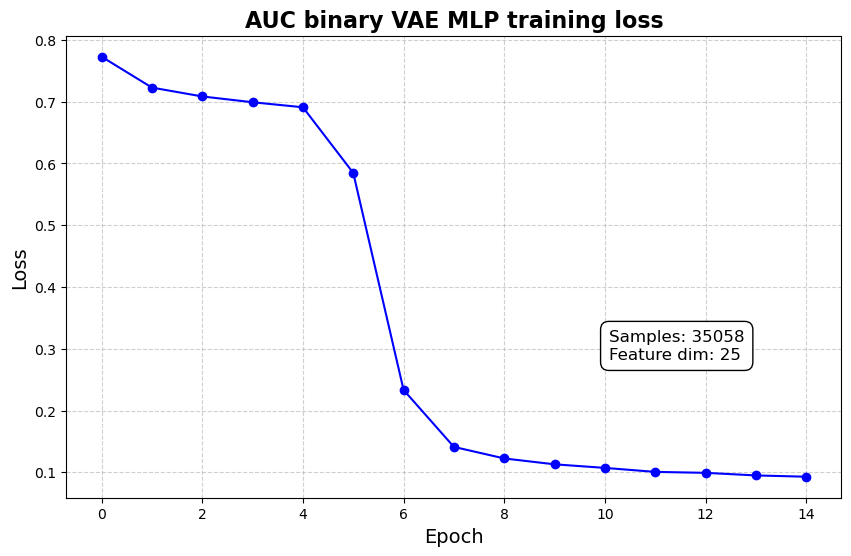

In [254]:
model_type = 'MLP'
plot_training_loss(history.history, latent_dim, merged_df, feat_type, model_type)

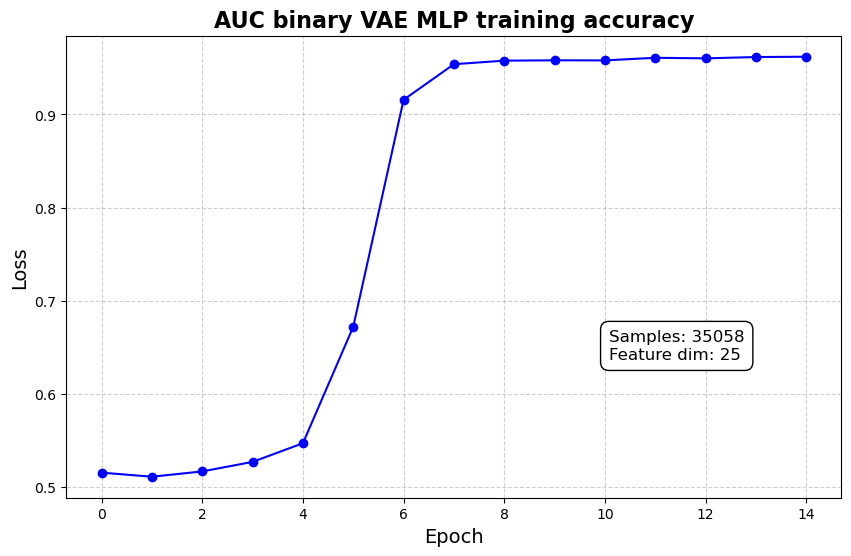

In [255]:
plot_training_accuracy(history.history, latent_dim, merged_df, feat_type, model_type)

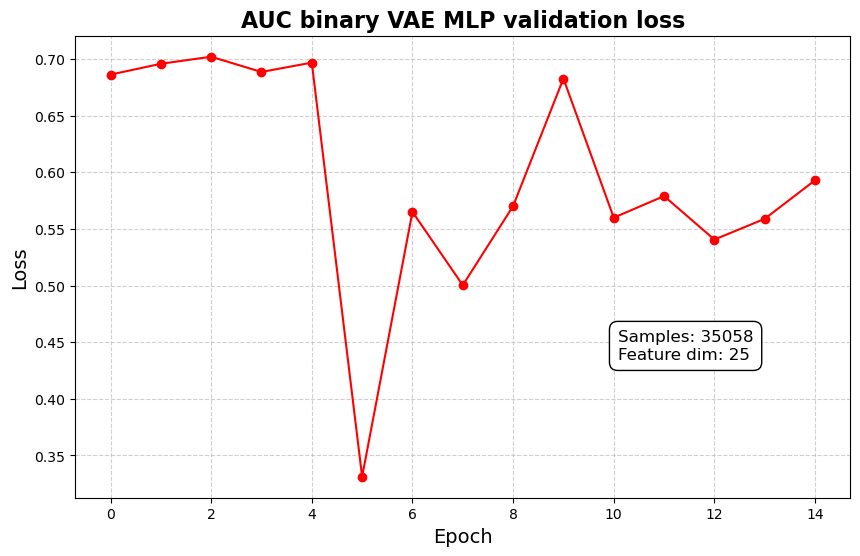

In [256]:
plot_validation_loss(history.history, latent_dim, merged_df, feat_type, model_type)

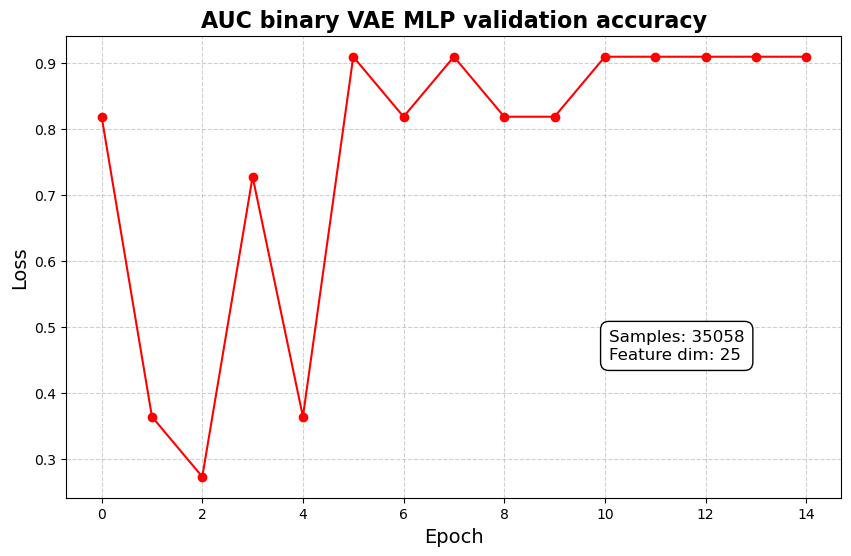

In [257]:
plot_validation_accuracy(history.history, latent_dim, merged_df, feat_type, model_type)

In [258]:
# MLP history save
pd.DataFrame(
    history.history).to_csv(
    'AUC_v1/MLP_history/MLP_history_'+feat_type+'_'+str(latent_dim)+'.tsv', sep = '\t')

In [259]:
def create_tabtransformer_classifier(
    num_transformer_blocks,
    num_heads,
    embedding_dims,
    mlp_hidden_units_factors,
    dropout_rate,
    use_column_embedding=False,
):

    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Stack categorical feature embeddings for the Tansformer.
    encoded_categorical_features = tf.stack(encoded_categorical_feature_list, axis=1)
    # Concatenate numerical features.
    numerical_features = layers.concatenate(numerical_feature_list)

    # Add column embedding to categorical feature embeddings.
    if use_column_embedding:
        num_columns = encoded_categorical_features.shape[1]
        column_embedding = layers.Embedding(
            input_dim=num_columns, output_dim=embedding_dims
        )
        column_indices = tf.range(start=0, limit=num_columns, delta=1)
        encoded_categorical_features = encoded_categorical_features + column_embedding(
            column_indices
        )

    # Create multiple layers of the Transformer block.
    for block_idx in range(num_transformer_blocks):
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dims,
            dropout=dropout_rate,
            name=f"multihead_attention_{block_idx}",
        )(encoded_categorical_features, encoded_categorical_features)
        # Skip connection 1.
        x = layers.Add(name=f"skip_connection1_{block_idx}")(
            [attention_output, encoded_categorical_features]
        )
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}", epsilon=1e-6)(x)
        # Feedforward.
        feedforward_output = create_mlp(
            hidden_units=[embedding_dims],
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{block_idx}",
        )(x)
        # Skip connection 2.
        x = layers.Add(name=f"skip_connection2_{block_idx}")([feedforward_output, x])
        # Layer normalization 2.
        encoded_categorical_features = layers.LayerNormalization(
            name=f"layer_norm2_{block_idx}", epsilon=1e-6
        )(x)

    # Flatten the "contextualized" embeddings of the categorical features.
    categorical_features = layers.Flatten()(encoded_categorical_features)
    # Apply layer normalization to the numerical features.
    numerical_features = layers.LayerNormalization(epsilon=1e-6)(numerical_features)
    # Prepare the input for the final MLP block.
    features = layers.concatenate([categorical_features, numerical_features])

    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


tabtransformer_model = create_tabtransformer_classifier(
    num_transformer_blocks=NUM_TRANSFORMER_BLOCKS,
    num_heads=NUM_HEADS,
    embedding_dims=EMBEDDING_DIMS,
    mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS,
    dropout_rate=DROPOUT_RATE,
)

print("Total model weights:", tabtransformer_model.count_params())

Total model weights: 262831


In [ ]:
# Observation:
    # 440k weights for 100 gexp features
    # 258k weights for gexp dim = 10 (max diff)
    # 263k weights for dim = 25 (max diff)

    # 259k @ UMAP dim = 10 (?)

In [260]:
history_tab = run_experiment(
    model=tabtransformer_model,
    train_data_file=train_data_file,
    test_data_file=test_data_file,
    num_epochs=NUM_EPOCHS,
    learning_rate=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    batch_size=BATCH_SIZE,
)

Start training the model...
Epoch 1/15
     97/Unknown - 4s 14ms/step - loss: 0.7495 - accuracy: 0.5248WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.
100/100 [==============================] - 5s 20ms/step - loss: 0.7488 - accuracy: 0.5251 - val_loss: 0.6055 - val_accuracy: 0.8182
Epoch 2/15
100/100 [==============================] - 2s 18ms/step - loss: 0.6164 - accuracy: 0.6599 - val_loss: 0.4354 - val_accuracy: 0.7273
Epoch 3/15
100/100 [==============================] - 2s 18ms/step - loss: 0.3246 - accuracy: 0.8708 - val_loss: 0.5757 - val_accuracy: 0.8182
Epoch 4/15
100/100 [==============================] - 2s 18ms/step - loss: 0.1762 - accuracy: 0.9418 - val_loss: 0.5800 - val_accuracy: 0.8182
Epoch 5/15
100/100 [============================

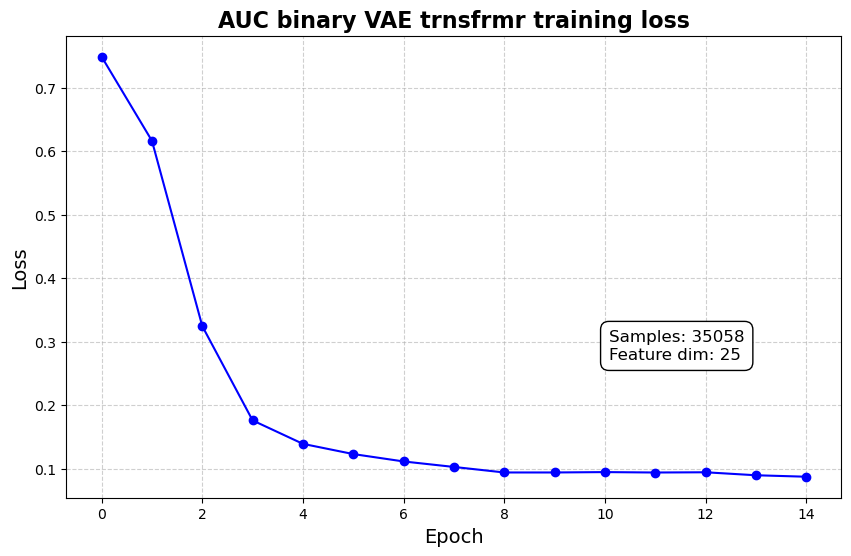

In [261]:
model_type = 'trnsfrmr'
plot_training_loss(history_tab.history, latent_dim, merged_df, feat_type, model_type)

In [ ]:
# Observation:
    # Transformer smooth loss with no step down vs MLP for UMAP dim = 25

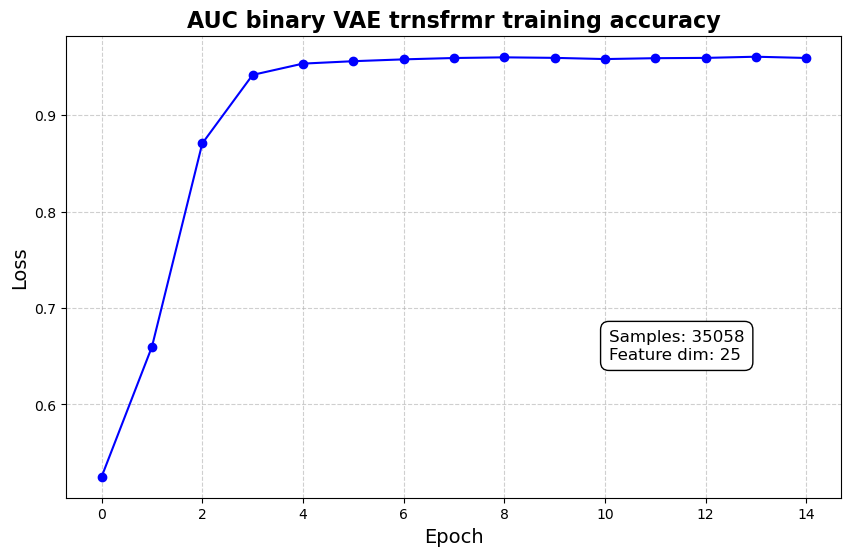

In [262]:
plot_training_accuracy(history_tab.history, latent_dim, merged_df, feat_type, model_type)

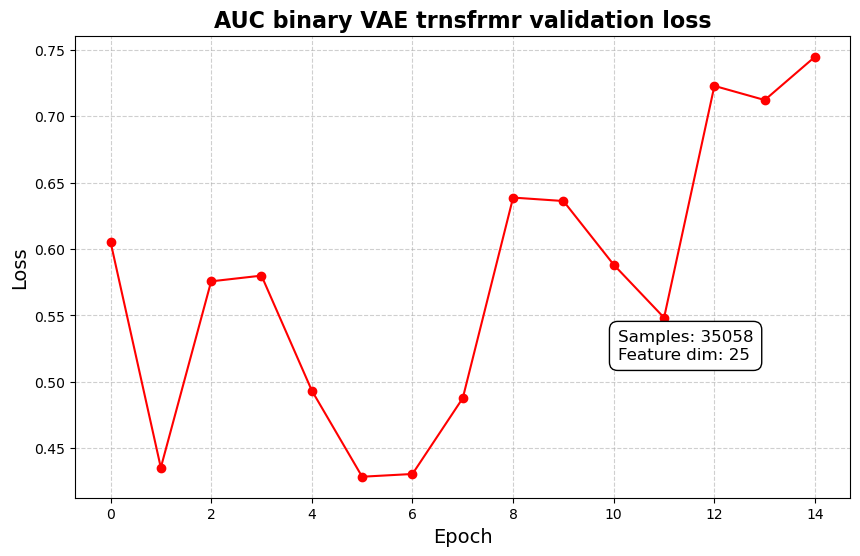

In [263]:
plot_validation_loss(history_tab.history, latent_dim, merged_df, feat_type, model_type)

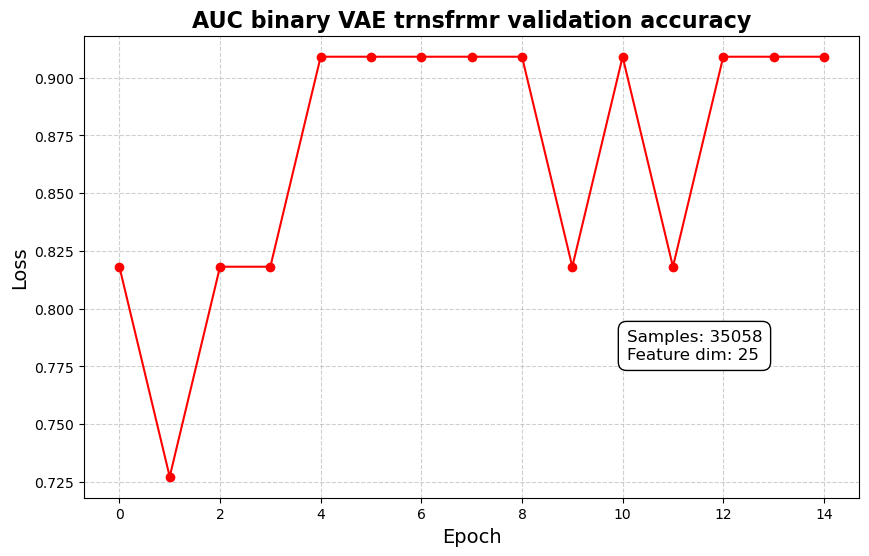

In [264]:
plot_validation_accuracy(history_tab.history, latent_dim, merged_df, feat_type, model_type)